In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Creation of data to distilation

#### create train_val_test distilation

In [145]:

from transfer_maks_4 import obtained_mask
from copy_samples_3 import n_samples

n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_70perc',split = 0.45) #60):
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_45perc',split = 0.45) #60):
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_25perc',split = 0.25) #60):
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_6perc',split = 0.06) #60):

945 236 709
945 56 889


In [147]:
###create file masks
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_70percc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_70perc/masks")
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_45percrc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_45perc/masks")
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_25perc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_25perc/masks")
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_6perc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_6perc/masks")

data_HR/dist_25perc/images/
data_HR/dist_6perc/images/


#### create train_val and test 

In [ ]:
from get_train_val_1 import split_train_val
from get_test_2 import split_train_test
from transfer_maks_4 import obtained_mask
from copy_samples_3 import n_samples

split_train_val(original_dataset_dir= '/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images',base_dir = "data_HR",validation_split = 0.10, train_file='train_val_HR_dist_2',val_file='test_HR_dist_2')

In [ ]:
obtained_mask(mode="val",original_dataset_dir_train="data_HR/train_val_HR_dist_2/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/train_val_HR_dist_2/masks" ,original_dataset_dir_val="data_HR/test_HR_dist_2/images",label_dir_val='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_val="data_HR/test_HR_dist_2/masks/")

In [ ]:
from get_train_val_1 import split_train_val
from get_test_2 import split_train_test
from transfer_maks_4 import obtained_mask
from copy_samples_3 import n_samples
#de train_val_dist use 70 images with the same test dist_hr
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/train_val_HR_dist_2/images",base_dir = "data_HR", train_n ='train_val_dist_60_2',split = 0.07) #60):

In [ ]:
###create file masks
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/train_val_dist_60_2/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/train_val_dist_60_2/masks")

### End create data to distilation

## Data initial of LR

In [ ]:
#create the dataset with the same features of the another dataset
from pathlib import Path
import numpy as np
import cv2
import gzip
import rasterio
import matplotlib.pyplot as plt
import os

data_path = Path('eopatches_png')

image_pth= data_path/'jpg'/'eopatch-{}.jpg'
#patches = glob('%s/*' % data_path)


image_name_path='/home/jgonzalez/Test_2019/Test_network/eopatches/eopatch-{}/data/BANDS-S2-L1C.npy.gz'
RGBNIR1_path='/home/jgonzalez/Test_2019/Test_network/eopatches/eopatch-{}/mask_timeless/water_label.npy.gz'


img_filename_npy_outpath = 'rgbnir{}.npy'
mask_filename_npy_outpath = 'rgbnir{}_a.npy'
#number of images 7670
# 3 red, 2 green, 1 blue, 8 nir??
for patches in range(18,19): #0372 no esta ese archivo
    img_path=str(image_name_path.format(str(patches).zfill(4)))
    f = gzip.GzipFile(img_path, "r")
    image_name=np.load(f)
    #print(image_name.shape)

    arrayRGBNIR=np.zeros((64,64,4))
    arrayRGBNIR[:,:,0]=(image_name[0,:,:,3])
    arrayRGBNIR[:,:,1]=(image_name[0,:,:,2])
    arrayRGBNIR[:,:,2]=(image_name[0,:,:,1])
    arrayRGBNIR[:,:,3]=(image_name[0,:,:,8])
    arrayRGB=arrayRGBNIR[:,:,:3]
    arrayRGBNIR=arrayRGBNIR.transpose((2, 0, 1))   #image: C X H X W  other dataset
    print(arrayRGBNIR.shape,arrayRGBNIR.dtype)
   # np.save(outpath_img_npy,arrayRGBNIR)

    print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor 
    fig = plt.figure(figsize=(30, 30))  # create a figure object
    plt.subplot(221)
    plt.imshow(arrayRGB*3.5) #2.5
    #https://github.com/sentinel-hub/eo-learn/blob/master/examples/tree-cover-keras/tree-cover-keras.ipynb

    f_a = gzip.GzipFile(str(RGBNIR1_path.format(str(patches).zfill(4))), "r")
    mask=np.load(f_a)
    print(mask.shape)
    arraymask1=(mask)#.transpose((2, 0, 1))
    #np.save(outpath_mask_npy,arraymask1)
    print("completed dataset LR")
    #print('mask', arraymask1.shape,arraymask1.dtype) # Ch,Hy,Wx tensor
        
    print('mask', arraymask1.shape,arraymask1.max(),arraymask1.min(),arraymask1.dtype) # Ch,Hy,Wx tensor
    plt.subplot(222)
    plt.imshow(arraymask1[:,:,0])

    #fig.savefig(str(image_pth).format(int(patches)))

### End data preparation LR

## Data HR and Mask

In [3]:
import numpy as np
import matplotlib.pyplot as plt

0 1421 (4, 512, 512)


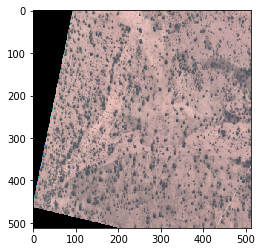

In [36]:
# IMAGES
img_path ="/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images/rgbnir10-4608.npy"
img = np.load(str(img_path))
print(np.min(img), np.max(img), np.shape(img))
img=img.transpose((1, 2, 0)) 
img = (img[:,:,:3]).astype(np.float32)
#inp = (img*255).astype(np.uint8)
plt.imshow(img/np.max(img))

0.0 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (512, 512)


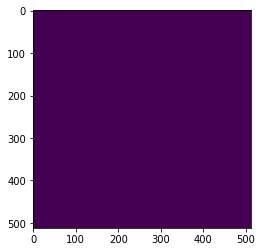

In [45]:
# MASKS
mask = np.load(str(img_path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0)
print(np.min(mask), np.max(mask))
mask=mask.transpose(1, 2, 0).reshape(mask.shape[1],-1)
mask=(mask > 0).astype(np.uint8)
plt.imshow(mask)
print(mask, mask.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


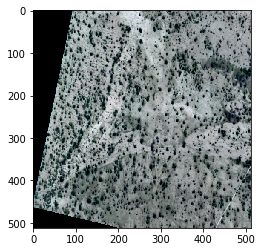

In [79]:
img=val_images[16,0,:,:].transpose((1, 2, 0)) 
img = (img[:,:,:3])
#inp = (img*255).astype(np.uint8)
plt.imshow(img/np.max(img))
print(img.shape)

(94, 1, 4, 512, 512) (94, 1, 1, 512, 512) (94, 1, 1, 512, 512)
b y_pred 0.0 0.99667907 0.4624718
b y_lb 0.0 1.0 <class 'numpy.ndarray'>
a y_pred 0.0 1.0 0.46889114
a y_lb 0.0 1.0 0.45679474
Dice =  0.9868583179141444
Jaccard =  0.9740575630867351
Dice =  tensor(0.9869)
Jaccard =  tensor(0.9741)
Dice =  [array([0.9868583], dtype=float32)]
Jaccard =  [array([0.97405756], dtype=float32)]


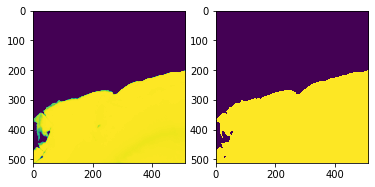

In [34]:
# Orden of the file respective/ Prediction_HR dist_60/  rgbnir104608 dice: 0.083494 IoU: 0.0
import torch
import torch.nn as nn

def dice_loss(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()    
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    cdice = (2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth) #1-Dice
    loss = 1 - cdice
    return loss.mean() #mean of the batch


#The Jaccard coefficient measures similarity between finite sample sets.
def metric_jaccard(pred, target):
    pred = pred.contiguous()
    target = target.contiguous()  
    epsilon= 1e-15  #epsilon! para evitar el indeterminado
    intersection = (pred*target).sum(dim=2).sum(dim=2)
    union = target.sum(dim=2).sum(dim=2) + pred.sum(dim=2).sum(dim=2) - intersection
    cjaccard = (intersection + epsilon)/ (union + epsilon)
    loss = 1 - cjaccard
    return loss.mean()#mean of the batch


def jaccard(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    return (intersection + 1e-15) / (union + 1e-15)


def dice(y_true, y_pred):
    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)


def get_jaccard(y_true, y_pred):
    epsilon = 1e-15
    intersection = (y_pred * y_true).sum(dim=-2).sum(dim=-1)
    union = y_true.sum(dim=-2).sum(dim=-1) + y_pred.sum(dim=-2).sum(dim=-1)

    return list((intersection / (union + epsilon - intersection)).data.cpu().numpy())


def get_dice(y_true, y_pred):
    epsilon = 1e-15
    intersection = (y_pred * y_true).sum(dim=-2).sum(dim=-1)
    union = y_true.sum(dim=-2).sum(dim=-1) + y_pred.sum(dim=-2).sum(dim=-1)
    return list((2 * intersection / (union + epsilon)).data.cpu().numpy())

val_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/inputs_test_dist_60_94_UNet11.npy")
pred_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/pred_test_dist_60_94_UNet11.npy")
val_label = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/labels_test_dist_60_94_UNet11.npy")

#val_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/inputs_test_HR_dist_94.npy")
#pred_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/pred_test_HR_dist_94.npy")
#val_label = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/labels_test_HR_dist_94.npy")

#val_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/inputs_val_dist_60_11.npy")
#pred_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/pred_val_dist_60_11.npy")
#val_label = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/labels_val_dist_60_11.npy")

print(val_images.shape, pred_images.shape,val_label.shape)
#print(pred_images[16,0,:,:].shape, pred_images[16,0,:,:])

#y_pred=pred_images[0,0,:,:].transpose(1,2,0)
#y_true=val_label[0,0,:,:].transpose(1,2,0)
#print('y_pred',y_pred.shape,np.min(y_pred), np.max(y_pred))
#print('y_lb',y_true.shape,np.min(y_true), np.max(y_true))






#y_pred= pred_images[0]
#y_true=val_label[0]
i=1
fig,(ax1,ax2)=plt.subplots(1,2)
ax1=plt.subplot(121)
ax1.imshow((((pred_images[i])[0].transpose(1,2,0))[:,:,0]))

print('b y_pred',np.min(pred_images[i]), np.max(pred_images[i]),np.mean(pred_images[i]))
#print('b y_pred',(pred_images[i]))
print('b y_lb',np.min(val_label[i]), np.max(val_label[i]),type(val_label[i]))

#pred_images[i]=(pred_images[i] >0).float() #!!!!! test 28 25

pred_images[i]=(pred_images[i] >0.55).astype(np.uint8) #.astype(np.float64) #!!!!! test 28
ax2=plt.subplot(122)
ax2.imshow((((pred_images[i])[0].transpose(1,2,0))[:,:,0]))
print('a y_pred',np.min(pred_images[i]), np.max(pred_images[i]),np.mean(pred_images[i]))
print('a y_lb',np.min(val_label[i]), np.max(val_label[i]),np.mean(val_label[i]))

print('Dice = ', dice(pred_images[i], val_label[i]))
print('Jaccard = ', jaccard(pred_images[i], val_label[i]))
print('Dice = ', 1-dice_loss(torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))
print('Jaccard = ',1- metric_jaccard( torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))

print('Dice = ', get_dice(torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))
print('Jaccard = ', get_jaccard( torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))

In [52]:
from pathlib import Path
import argparse
import cv2
import numpy as np
from tqdm import tqdm




In [ ]:
if __name__ == '__main__':

    result_dice = []
    result_jaccard = []

    for i in range(len(val_label)):
        y_true=val_label[i]
        y_pred=pred_images[i]
        #y_true = (cv2.imread(str(file_name), 0) > 255 * 0.5).astype(np.uint8)

        #pred_file_name = Path(args.target_path) / (file_name.stem.replace('_a', '') + '.png')

        #y_pred = (cv2.imread(str(pred_file_name), 0) > 255 * 0.5).astype(np.uint8)

        result_dice += [dice(y_true, y_pred)]
        result_jaccard += [jaccard(y_true, y_pred)]

    print('Dice = ', np.mean(result_dice), np.std(result_dice))
    print('Jaccard = ', np.mean(result_jaccard), np.std(result_jaccard))

### End data HR and Mask

## Create Histogram

In [ ]:
from histogram import  hist_data

fig=hist_data(files_root='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/histogram',pixel_max=3521,name='Perusat',proce='Light')


### End create

## Create graphic Compare results HR and Combined Model 

In [ ]:
def read_data(path, name):
    loss_file = open(path)
    filedata = loss_file.read()
    filedata = filedata.replace("bce",",bce")
    filedata = filedata.split(",")
    metric=[]
    for i in filedata:
        i = i.strip(" ")
        if str(i).startswith(name):
            i = i.split(" ")
            metric.append(float(i[1]))
    return metric

dice_HR=read_data("/home/jgonzalez/Test_2019/Test_network/model_HR/predictions/pred_loss_HR_fake.txt", name="dice")
dice_dist=read_data("/home/jgonzalez/Test_2019/Test_network/model_HR/predictions/pred_loss_HR_fake_60.txt",name="dice")
dice_dist_400=read_data("/home/jgonzalez/Test_2019/Test_network/model_LR_HR_paralel/predictions/pred_loss_dist_paral_fake.txt",name="dice")
dice_dist_100=read_data("/home/jgonzalez/Test_2019/Test_network/model_LR_HR_paralel/predictions/pred_loss_dist_paral_fake_60.txt",name="dice")

print(len(dice_HR), len(dice_dist))

f = plt.figure()
y_HR = np.asarray(dice_HR)
y_dist = np.asarray(dice_dist)
y_dist_400 = np.asarray(dice_dist_400)
y_dist_100 = np.asarray(dice_dist_100)


x =np.asarray(list(range(0,len(dice_HR))))
plt.xlabel("Number of test images")
plt.ylabel("Dice")
plt.title("predictions_with_dice") 

plt.plot(x,y_HR,label = 'model_HR_93')
plt.plot(x,y_dist ,'k', label = 'model_HR_60')
plt.plot(x,y_dist_400 ,'r', label = 'dist_93')
plt.plot(x,y_dist_100 ,'g', label = 'dist_60')

plt.legend()
plt.show()
#f.savefig("predictions/loss_convergence_100.pdf", bbox_inches='tight')


## End graphic

## Plot graphic Mask + Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rasterio as rio
import cv2


def mask_overlay(image, mask, color=(15, 15, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    print(mask.shape)      
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.float32)

    weighted_sum = cv2.addWeighted(mask, 0.3, image, 0.7, 0.)
    img = image.copy()
    ind = mask[:, :, 0] > 0  
    img[ind] = weighted_sum[ind]  
 #########################################
   # mapRGB = mask.astype(np.float32)

    ##Preprocesar la imagen original
    #out=np.asarray(image)
    #out=out.astype(np.float32)
    #outFinal=out*0.5 +mapRGB*0.5

    return img


def print_stat(root_img, maximunValue=3413):

    im_pths =np.array(sorted(list(root_img.glob('*.npy'))))
    print(np.shape(im_pths))

    for path in im_pths:
        image = np.load(str(path)) # 
        arrayRGB=image.transpose(1,2,0).astype(np.float32)
        
        arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max()) ####

        print('image', arrayRGB.shape) # Ch,Hy,Wx tensor    

        mask= np.load(str(path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0)
        arraymask=(mask > 0).astype(np.uint8)
        arraymask=mask.transpose(1,2,0).astype(np.float32)
        arraymask=(arraymask[:,:,0])  #importante uint8
        print('mask', arraymask.shape) # Ch,Hy,Wx tensor

        fig = plt.figure(figsize=(30, 30))  # create a figure object
        plt.subplots_adjust(hspace=0.2, wspace=0.2)
        ax1=plt.subplot(131)
        ax1.imshow(arrayRGB)
        ax2=plt.subplot(132)
        ax2.imshow(arraymask)
        
        mask2 = (arraymask >0.5)
        ax3=plt.subplot(133)
        print(arraymask.dtype,mask2.dtype)
        ax3.imshow(mask_overlay(arrayRGB, mask2))

        fig.savefig(str(path).replace(r'.npy', r'_f.png'))
        
from pathlib import Path
import timeit

data_path = Path('data')
train_root_img= data_path/'train'/'images'
print_stat(train_root_img,3521)

### Cross Validation


In [223]:
from pathlib import Path
from sklearn.model_selection import KFold
import numpy as np


def get_split_out(path,name_file, fold, num_splits=5):
    data_path=Path(path)

    train_path = data_path / name_file / 'images'

    train_file_names = np.array(sorted(list(train_path.glob('*npy'))))

    kf = KFold(n_splits=num_splits, random_state=2019, shuffle=True)
    #kf = KFold(n_splits=num_splits, random_state=20018)


    ids = list(kf.split(train_file_names))

    train_ids, val_ids = ids[fold]

    if fold == -1:
        return train_file_names, train_file_names
    else:
        return train_file_names[train_ids], train_file_names[val_ids]


if __name__ == '__main__':
    train_file_names,val_file_names = get_split_out('data_HR','data',0)
    #train_file_names,val_file_names = get_split_out('data_HR','dist_6percent',1)

    

In [224]:
print(len(train_file_names))
print(len(val_file_names))

for val_name in val_file_names:
     print(val_name)
 
print('-----------------------------------')
for train_name in train_file_names:
     print(train_name)

756
189
data_HR/data/images/rgbnir00-4608.npy
data_HR/data/images/rgbnir01024-2048.npy
data_HR/data/images/rgbnir01024-2560.npy
data_HR/data/images/rgbnir01536-512.npy
data_HR/data/images/rgbnir02048-1024.npy
data_HR/data/images/rgbnir02048-512.npy
data_HR/data/images/rgbnir02560-2560.npy
data_HR/data/images/rgbnir03072-1536.npy
data_HR/data/images/rgbnir03072-2048.npy
data_HR/data/images/rgbnir03072-4096.npy
data_HR/data/images/rgbnir03072-5120.npy
data_HR/data/images/rgbnir03584-4096.npy
data_HR/data/images/rgbnir04096-1024.npy
data_HR/data/images/rgbnir04096-2560.npy
data_HR/data/images/rgbnir04096-5120.npy
data_HR/data/images/rgbnir04608-5120.npy
data_HR/data/images/rgbnir11024-0.npy
data_HR/data/images/rgbnir11024-2048.npy
data_HR/data/images/rgbnir11024-2560.npy
data_HR/data/images/rgbnir11024-3072.npy
data_HR/data/images/rgbnir11024-4608.npy
data_HR/data/images/rgbnir11024-512.npy
data_HR/data/images/rgbnir11536-3584.npy
data_HR/data/images/rgbnir11536-4096.npy
data_HR/data/imag

In [225]:

def percent_split(train_val_100percent, percent = 0.7): 
    
    fpath_list = train_val_100percent


    dataset_size = len(fpath_list)
    indices = list(range(dataset_size))
    percent = int(np.floor(percent * dataset_size))
    if 1 :
        np.random.seed(2019)
        np.random.shuffle(indices)        

    extra_indices, train_indices_split = indices[percent:], indices[:percent]
    print(dataset_size,len(train_indices_split), len(extra_indices))
    
   
    return train_val_100percent[train_indices_split]#, train_val_100percent[val_ids]
    
    ############################################################
print('----------------------------------------------')

train_file_names= n_samples_split(train_file_names, percent = 0.06) 
    
for train_name_split in train_indices_split:
     print(train_name_split)

----------------------------------------------
756 45 711
data_HR/data/images/rgbnir63584-3584.npy
data_HR/data/images/rgbnir35120-512.npy
data_HR/data/images/rgbnir23072-4608.npy
data_HR/data/images/rgbnir53584-4608.npy
data_HR/data/images/rgbnir22048-2048.npy
data_HR/data/images/rgbnir54096-2048.npy
data_HR/data/images/rgbnir6512-5120.npy
data_HR/data/images/rgbnir37168-0.npy
data_HR/data/images/rgbnir52560-5632.npy
data_HR/data/images/rgbnir23584-3584.npy
data_HR/data/images/rgbnir30-6656.npy
data_HR/data/images/rgbnir23584-5120.npy
data_HR/data/images/rgbnir03584-3072.npy
data_HR/data/images/rgbnir15120-3072.npy
data_HR/data/images/rgbnir43072-5120.npy
data_HR/data/images/rgbnir55632-2048.npy
data_HR/data/images/rgbnir25632-2048.npy
data_HR/data/images/rgbnir32048-5632.npy
data_HR/data/images/rgbnir36656-4608.npy
data_HR/data/images/rgbnir42048-3584.npy
data_HR/data/images/rgbnir35632-512.npy
data_HR/data/images/rgbnir35120-5632.npy
data_HR/data/images/rgbnir37168-1024.npy
data_HR/

In [232]:

from pathlib import Path
from sklearn.model_selection import KFold
import numpy as np


def get_split_in(train_file_names, fold, num_splits=5):
 
    kf = KFold(n_splits=num_splits, random_state=2019,shuffle=True)
    #kf = KFold(n_splits=num_splits, random_state=20018)


    ids = list(kf.split(train_file_names))

    train_ids, val_ids = ids[fold]

    if fold == -1:
        return train_file_names, train_file_names
    else:
        return train_file_names[train_ids], train_file_names[val_ids]
    
    
if __name__ == '__main__':
    train_file_names_2,val_file_names_2 = get_split_in(train_file_names,3)
    

In [233]:
print(len(train_file_names_2))
print(len(val_file_names_2))

for val_name_2 in val_file_names_2:
     print(val_name_2)

print('----------------------------------------------')

for train_name_2 in train_file_names_2:
     print(train_name_2)

36
9
data_HR/data/images/rgbnir53584-1536.npy
data_HR/data/images/rgbnir37168-2560.npy
data_HR/data/images/rgbnir36656-5120.npy
data_HR/data/images/rgbnir42048-5120.npy
data_HR/data/images/rgbnir35120-6144.npy
data_HR/data/images/rgbnir55632-1536.npy
data_HR/data/images/rgbnir54608-512.npy
data_HR/data/images/rgbnir61536-5120.npy
data_HR/data/images/rgbnir53584-512.npy
----------------------------------------------
data_HR/data/images/rgbnir63584-4608.npy
data_HR/data/images/rgbnir35120-4608.npy
data_HR/data/images/rgbnir22560-3584.npy
data_HR/data/images/rgbnir53072-4096.npy
data_HR/data/images/rgbnir21536-2048.npy
data_HR/data/images/rgbnir65120-2048.npy
data_HR/data/images/rgbnir52048-512.npy
data_HR/data/images/rgbnir23072-2048.npy
data_HR/data/images/rgbnir25120-1536.npy
data_HR/data/images/rgbnir23072-3584.npy
data_HR/data/images/rgbnir03584-1024.npy
data_HR/data/images/rgbnir1512-2048.npy
data_HR/data/images/rgbnir43072-6144.npy
data_HR/data/images/rgbnir55120-4096.npy
data_HR/d

In [222]:
percent=0.7
name_file = '_'+ str(int(percent*100))+'_percent'
name_file

'_70_percent'